In [2]:
import pandas as pd
import numpy as np
!ls

Activity 11.ipynb    harold_portfolio.csv my_portfolio.csv


In [3]:
# importing the files
harold = pd.read_csv("harold_portfolio.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
my = pd.read_csv("my_portfolio.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)

In [7]:
# Preparing the Data
harold.dropna()
my.dropna()

,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,
2019-05-20,8200.00,0.003041,261.09,95.06,0.398003,0.135545
2019-05-19,7262.40,0.003178,234.03,86.65,0.417700,0.141485
2019-05-18,7363.69,0.003005,244.59,89.88,0.372736,0.128833
2019-05-17,7878.96,0.002962,264.39,95.75,0.386193,0.126562
2019-05-16,8203.32,0.003168,249.00,102.26,0.419707,0.137283
...,...,...,...,...,...,...
2016-08-28,570.42,0.000230,11.21,3.78,0.005869,0.002020
2016-08-27,578.89,0.000228,11.29,3.81,0.005902,0.001931
2016-08-26,576.16,0.000242,11.34,3.81,0.005892,0.001925


In [8]:
# Calculate daily returns for each portfolio
harold_returns = harold.pct_change().dropna().copy()
my_returns = my.pct_change().dropna().copy()

In [9]:
# Display sample data
harold_returns.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,
2019-05-19,0.010052,-0.110362,0.045051,-0.103642,-0.088470,0.049490,-0.112904,0.043823,0.026939,0.065474
2019-05-18,-0.114341,-0.059659,-0.054437,0.045122,0.037276,-0.107647,-0.042606,-0.089423,-0.083820,-0.077465
2019-05-17,0.013947,-0.036254,-0.014309,0.080952,0.065309,0.036103,-0.097778,-0.017627,0.014801,0.011705
2019-05-16,0.069974,-0.075235,0.069548,-0.058209,0.067990,0.086780,-0.139457,0.084709,0.060140,0.046557
2019-05-15,0.041168,-0.037288,0.044192,-0.126747,-0.103364,0.086484,0.007420,-0.002047,0.086322,0.088224


In [16]:
# Display sample data
my_returns.head()

,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,
2019-05-19,-0.114341,0.045051,-0.103642,-0.088470,0.049490,0.043823
2019-05-18,0.013947,-0.054437,0.045122,0.037276,-0.107647,-0.089423
2019-05-17,0.069974,-0.014309,0.080952,0.065309,0.036103,-0.017627
2019-05-16,0.041168,0.069548,-0.058209,0.067990,0.086780,0.084709
2019-05-15,-0.025892,0.044192,-0.126747,-0.103364,0.086484,-0.002047


In [19]:
# reseting values to mitigate errors
harold_returns.reset_index(inplace=True, drop=True)
my_returns.reset_index(inplace=True, drop=True)
# Concat returns DataFrames
all_returns = pd.concat([harold_returns,my_returns], axis="columns", join="inner")
all_returns.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL,BTC,DOGE,ETH,LTC,XRP,XLM
0,0.010052,-0.110362,0.045051,-0.103642,-0.088470,0.049490,-0.112904,0.043823,0.026939,0.065474,-0.114341,0.045051,-0.103642,-0.088470,0.049490,0.043823
1,-0.114341,-0.059659,-0.054437,0.045122,0.037276,-0.107647,-0.042606,-0.089423,-0.083820,-0.077465,0.013947,-0.054437,0.045122,0.037276,-0.107647,-0.089423
2,0.013947,-0.036254,-0.014309,0.080952,0.065309,0.036103,-0.097778,-0.017627,0.014801,0.011705,0.069974,-0.014309,0.080952,0.065309,0.036103,-0.017627
3,0.069974,-0.075235,0.069548,-0.058209,0.067990,0.086780,-0.139457,0.084709,0.060140,0.046557,0.041168,0.069548,-0.058209,0.067990,0.086780,0.084709
4,0.041168,-0.037288,0.044192,-0.126747,-0.103364,0.086484,0.007420,-0.002047,0.086322,0.088224,-0.025892,0.044192,-0.126747,-0.103364,0.086484,-0.002047


In [39]:
all_returns

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL,BTC,DOGE,ETH,LTC,XRP,XLM
0,0.010052,-0.110362,0.045051,-0.103642,-0.088470,0.049490,-0.112904,0.043823,0.026939,0.065474,-0.114341,0.045051,-0.103642,-0.088470,0.049490,0.043823
1,-0.114341,-0.059659,-0.054437,0.045122,0.037276,-0.107647,-0.042606,-0.089423,-0.083820,-0.077465,0.013947,-0.054437,0.045122,0.037276,-0.107647,-0.089423
2,0.013947,-0.036254,-0.014309,0.080952,0.065309,0.036103,-0.097778,-0.017627,0.014801,0.011705,0.069974,-0.014309,0.080952,0.065309,0.036103,-0.017627
3,0.069974,-0.075235,0.069548,-0.058209,0.067990,0.086780,-0.139457,0.084709,0.060140,0.046557,0.041168,0.069548,-0.058209,0.067990,0.086780,0.084709
4,0.041168,-0.037288,0.044192,-0.126747,-0.103364,0.086484,0.007420,-0.002047,0.086322,0.088224,-0.025892,0.044192,-0.126747,-0.103364,0.086484,-0.002047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,0.000000,0.000000,0.013043,0.000000,0.000000,-0.043107,0.000000,0.000000,0.000000,0.000000,0.000000,0.013043,0.000000,0.000000,-0.043107,-0.021188
1627,0.000000,0.000000,-0.012876,0.000000,0.000000,-0.032064,0.000000,0.000000,0.000000,0.000000,0.000000,-0.012876,0.000000,0.000000,-0.032064,0.008065
1628,0.000000,0.000000,0.030435,0.000000,0.000000,-0.015963,0.000000,0.000000,0.000000,0.000000,0.000000,0.030435,0.000000,0.000000,-0.015963,-0.000842
1629,0.000000,0.000000,0.012658,0.000000,0.000000,0.002133,0.000000,0.000000,0.000000,0.000000,0.000000,0.012658,0.000000,0.000000,0.002133,0.015171


In [22]:
# Calculate std dev
all_portfolio_std = all_returns.std()
all_portfolio_std.head()

BTC     0.049189
BTT     0.006185
DOGE    0.062264
ETH     0.050074
LTC     0.048783
dtype: float64

In [28]:
# Calculate Sharpe Ratio
sharpe_ratios = (all_returns.mean() * 252) / (all_portfolio_std * np.sqrt(252))
sharpe_ratios.head()

BTC    -0.269714
BTT    -0.878716
DOGE    0.105533
ETH    -0.214963
LTC    -0.222482
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

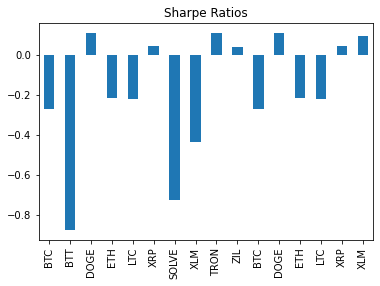

In [29]:
# Plot sharpe ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [30]:
# Challenge
# Calculate the Sharpe ratio for your entire portfolio. Then, use a comparison operator to see which portfolio has the greatest risk-to-reward ratio.
# Calculate standard deviaton for all investments for each portfolio
harold_std_annual = harold_returns.std() * np.sqrt(252)
my_std_annual = my_returns.std() * np.sqrt(252)

In [31]:
# Print Harold's annual standard deviation
harold_std_annual

BTC      0.780844
BTT      0.098188
DOGE     0.988407
ETH      0.794908
LTC      0.774413
XRP      1.041300
SOLVE    0.082041
XLM      0.164566
TRON     0.974481
ZIL      0.167653
dtype: float64

In [32]:
# Print my annual standard deviation
my_std_annual

BTC     0.780832
DOGE    0.988407
ETH     0.794908
LTC     0.774413
XRP     1.041300
XLM     1.161224
dtype: float64

In [33]:
# Calculate sharpe ratios
harold_sharpe_ratios = (harold_returns.mean() * 252) / (harold_std_annual)
my_sharpe_ratios = (my_returns.mean() * 252) / (my_std_annual)

In [34]:
# Print Harold's sharpe ratios
harold_sharpe_ratios

BTC     -0.269714
BTT     -0.878716
DOGE     0.105533
ETH     -0.214963
LTC     -0.222482
XRP      0.042017
SOLVE   -0.725681
XLM     -0.438047
TRON     0.109291
ZIL      0.037144
dtype: float64

In [35]:
# Print my sharpe ratios
my_sharpe_ratios

BTC    -0.271707
DOGE    0.105533
ETH    -0.214963
LTC    -0.222482
XRP     0.042017
XLM     0.092458
dtype: float64

In [36]:
# Averaging sharpe ratios
harold_sharpe_avg = harold_sharpe_ratios.mean()
my_sharpe_avg = my_sharpe_ratios.mean()

# Display results
print("Harold's sharpe ratio average:", harold_sharpe_avg)
print("My sharpe ratio average:", my_sharpe_avg)

Harold's sharpe ratio average: -0.2455617504533382
My sharpe ratio average: -0.07819064492771298


In [40]:
# Determine if Harold's average is greater
# HINT: Use a comparison operator like so: harold_sharpe_avg > my_sharpe_avg
harold_sharpe_avg > my_sharpe_avg

False